In [4]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Exploratory Data Analysis

## Data Overview

In [5]:
df=pd.read_csv('Consumer_complaints.csv')

/home/ubuntu/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (5,6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head().T

,0,1,2,3,4
Date received,03/21/2016,03/21/2016,03/21/2016,03/21/2016,03/21/2016
Product,Debt collection,Consumer Loan,Debt collection,Consumer Loan,Bank account or service
Sub-product,"Other (i.e. phone, health club, etc.)",Personal line of credit,"Other (i.e. phone, health club, etc.)",Vehicle loan,Checking account
Issue,Cont'd attempts collect debt not owed,Problems when you are unable to pay,Cont'd attempts collect debt not owed,Taking out the loan or lease,Problems caused by my funds being low
Sub-issue,Debt was paid,NaN,Debt is not mine,NaN,NaN
Consumer complaint narrative,NaN,NaN,NaN,NaN,NaN
Company public response,Company believes it acted appropriately as aut...,NaN,NaN,NaN,NaN
Company,"Eastern Account Systems of Connecticut, Inc.","OneMain Financial Holdings, LLC",Transworld Systems Inc.,Navy FCU,Navy FCU
State,CA,AL,CT,VA,IN
ZIP code,900XX,35094,06516,235XX,46143


In [7]:
df.shape

(537992, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537992 entries, 0 to 537991
Data columns (total 18 columns):
Date received                   537992 non-null object
Product                         537992 non-null object
Sub-product                     386187 non-null object
Issue                           537979 non-null object
Sub-issue                       203546 non-null object
Consumer complaint narrative    59697 non-null object
Company public response         75922 non-null object
Company                         537992 non-null object
State                           530979 non-null object
ZIP code                        533186 non-null object
Tags                            75267 non-null object
Consumer consent provided?      110728 non-null object
Submitted via                   537989 non-null object
Date sent to company            537992 non-null object
Company response to consumer    537992 non-null object
Timely response?                537992 non-null object
Consumer dis

In [9]:
df=df.dropna(subset=['Consumer complaint narrative'])

In [10]:
df.shape

(59697, 18)

In [11]:
df['Consumer complaint narrative'].value_counts().shape

(58642,)

In [12]:
#ix = list(df.index)

In [13]:
#df = df.ix[ix[:40000]]

In [14]:
df.shape

(59697, 18)

In [15]:
df['Consumer complaint narrative'].value_counts().shape

(58642,)

In [16]:
df['Company'].value_counts(dropna=False).shape

(2213,)

In [17]:
df['Product'].value_counts(dropna=False)

Debt collection            15730
Mortgage                   13375
Credit reporting           11138
Credit card                 6983
Bank account or service     5136
Consumer Loan               3237
Student loan                1919
Prepaid card                 821
Payday loan                  667
Money transfers              596
Other financial service       95
Name: Product, dtype: int64

In [18]:
df['Sub-issue'].value_counts().shape

(64,)

In [19]:
df['Issue'].value_counts()

Incorrect information on credit report      7447
Cont'd attempts collect debt not owed       6746
Loan servicing, payments, escrow account    5847
Loan modification,collection,foreclosure    4617
Disclosure verification of debt             2612
Communication tactics                       2490
Account opening, closing, or management     1981
Credit reporting company's investigation    1741
Application, originator, mortgage broker    1472
False statements or representation          1467
Managing the loan or lease                  1437
Deposits and withdrawals                    1272
Taking/threatening an illegal action        1244
Dealing with my lender or servicer          1216
Improper contact or sharing of info         1171
Billing disputes                            1062
Settlement process and costs                 928
Unable to get credit report/credit score     912
Problems when you are unable to pay          908
Problems caused by my funds being low        833
Other               

In [20]:
df['Company public response'].value_counts(dropna=False)

NaN                                                                                                                        30556
Company chooses not to provide a public response                                                                           19311
Company believes it acted appropriately as authorized by contract or law                                                    5876
Company has responded to the consumer and the CFPB and chooses not to provide a public response                             1044
Company disputes the facts presented in the complaint                                                                        634
Company believes complaint caused principally by actions of third party outside the control or direction of the company      615
Company believes the complaint is the result of a misunderstanding                                                           561
Company believes complaint is the result of an isolated error                                    

In [21]:
df['Company response to consumer'].value_counts(dropna=False)

Closed with explanation            45491
Closed with non-monetary relief     7738
Closed with monetary relief         4402
Closed                              1614
Untimely response                    450
In progress                            2
Name: Company response to consumer, dtype: int64

In [22]:
df['Tags'].value_counts(dropna=False)

NaN                              49538
Older American                    5424
Servicemember                     4005
Older American, Servicemember      730
Name: Tags, dtype: int64

In [23]:
df['Date received'].max()

'12/31/2015'

In [24]:
df['Date received'].min()

'01/01/2016'

In [25]:
df['Submitted via'].value_counts(dropna=False)

Web    59697
Name: Submitted via, dtype: int64

In [26]:
df['Timely response?'].value_counts(dropna=False)

Yes    57788
No      1909
Name: Timely response?, dtype: int64

In [27]:
df['Consumer disputed?'].value_counts(dropna=False)

No     45750
Yes    13947
Name: Consumer disputed?, dtype: int64

In [28]:
temp= pd.crosstab(df['Product'], df['Consumer disputed?'])

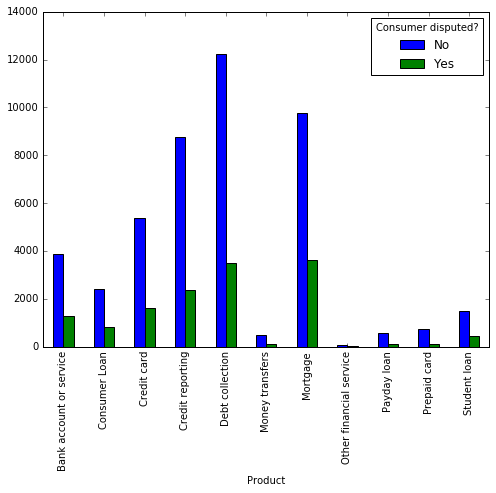

In [29]:
temp.plot(kind='bar',figsize=(8,6))## The disputed percentages are about same between 
###Consent and Consent Not "complaint narrative text".

In [30]:
temp1= pd.crosstab(df['Company response to consumer'], df['Consumer disputed?'])

In [31]:
temp1

Consumer disputed?,No,Yes
Company response to consumer,,
Closed,1099,515
Closed with explanation,33628,11863
Closed with monetary relief,3879,523
Closed with non-monetary relief,6692,1046
In progress,2,0
Untimely response,450,0


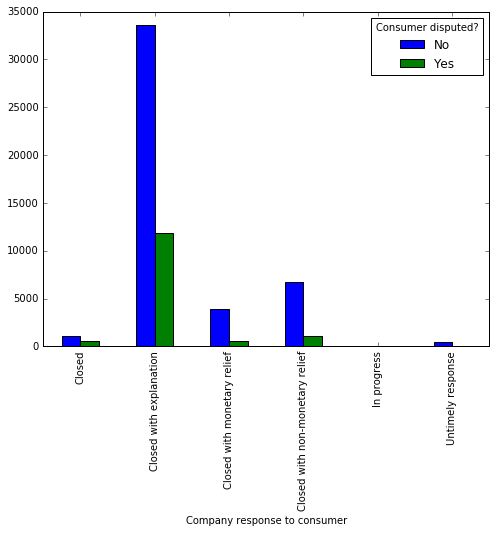

In [32]:
temp1.plot(kind='bar',figsize=(8,6)) ###Most cases are fall in closed with explaination

In [33]:
temp3= pd.crosstab(df['Product'], df['Consumer disputed?'])

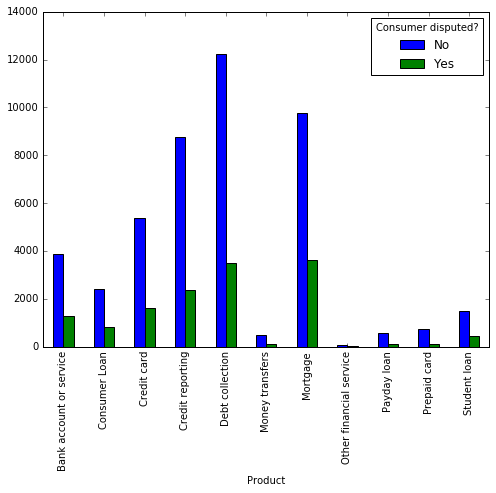

In [34]:
temp3.plot(kind='bar',figsize=(8,6))

In [35]:
##plt.hist(np.log(df['Company'].value_counts()))
##plt.xlabel(df['Company'].value_counts().index)

In [36]:
df['State'].value_counts().shape

(60,)

In [37]:
df['Date received']=pd.DatetimeIndex(df['Date received'],format='%m/%d/%Y').date
df['Date sent to company']=pd.DatetimeIndex(df['Date sent to company'],format='%m/%d/%Y').date

In [38]:
df[df['Date received']!=df['Date sent to company']].shape

(16256, 18)

## Missing Value Handling

In [39]:
df[pd.isnull(df['Issue'])]

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID


In [40]:
df['Sub-product'].fillna('Not Provided',inplace=True)
df['Sub-issue'].fillna('Not Provided',inplace=True)
df['Consumer complaint narrative'].fillna('None or Not Provided',inplace=True)
###Combine "company public missing value" with "Company chose not to provide"
df['Company public response'].fillna('Company chooses not to provide',inplace=True) 

###Combine missing value of "Issue" with "Other"
df['Issue'].fillna('Other',inplace=True) 

### Replace missing vlaues of 'Tags' with "'Unknown'
df['Tags'].fillna('Unknown',inplace=True) 

### Replace missing vlaues of 'Submitted via' with "'other'
df['Submitted via'].fillna('Other',inplace=True) 

###Combine missing value,other,and withdrawn of "Consumer consent provided? " 
###with Consumer consent not provided, since only users's complaints narrative will be provided
### with the type of Consumer consent provided
df['Consumer consent provided?'].fillna('Consent not provided',inplace=True) 
df['Consumer consent provided?']=df['Consumer consent provided?'].apply(lambda x: 
            'Consent not provided' if x=='Other' or x=='Consent withdrawn' else x)

In [41]:
### Fill missing 'State' info using valide zipcode.
from pyzipcode import ZipCodeDatabase
zip=ZipCodeDatabase()
for i in df[pd.isnull(df['State'])&pd.notnull(df['ZIP code'])].index:
    try:
        df['State'][i]=str(zip[df['ZIP code'][i]].state)
    except:
        continue

In [42]:
df[pd.isnull(df['State'])&pd.isnull(df['ZIP code'])].shape ###Still 4268 users has no state info

(159, 18)

In [43]:
df['State'].fillna('Not provided',inplace=True)
df['ZIP code'].fillna('Not Provided',inplace=True)

In [44]:
df['Consumer consent provided?'].value_counts(dropna=False)

Consent provided    59697
Name: Consumer consent provided?, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59697 entries, 1394 to 167778
Data columns (total 18 columns):
Date received                   59697 non-null object
Product                         59697 non-null object
Sub-product                     59697 non-null object
Issue                           59697 non-null object
Sub-issue                       59697 non-null object
Consumer complaint narrative    59697 non-null object
Company public response         59697 non-null object
Company                         59697 non-null object
State                           59697 non-null object
ZIP code                        59697 non-null object
Tags                            59697 non-null object
Consumer consent provided?      59697 non-null object
Submitted via                   59697 non-null object
Date sent to company            59697 non-null object
Company response to consumer    59697 non-null object
Timely response?                59697 non-null object
Consumer disputed?     

In [46]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
1394,2016-03-09,Credit reporting,Not Provided,Incorrect information on credit report,Account terms,I have been trying to clean my credit report u...,Company has responded to the consumer and the ...,Experian,OK,731XX,Unknown,Consent provided,Web,2016-03-09,Closed with non-monetary relief,Yes,No,1825051
1401,2016-03-09,Credit reporting,Not Provided,Unable to get credit report/credit score,Problem getting report or credit score,"Hi, the i am unable to obtain my my credit rep...",Company has responded to the consumer and the ...,Experian,NY,115XX,Unknown,Consent provided,Web,2016-03-09,Closed with non-monetary relief,Yes,No,1825432
1412,2016-03-09,Credit reporting,Not Provided,Unable to get credit report/credit score,Problem getting report or credit score,"hi, the i am unable to obtain my my credit rep...",Company has responded to the consumer and the ...,"TransUnion Intermediate Holdings, Inc.",NY,115XX,Unknown,Consent provided,Web,2016-03-09,Closed with non-monetary relief,Yes,No,1825018
1413,2016-03-09,Debt collection,I do not know,Disclosure verification of debt,Not given enough info to verify debt,I mailed MRS BPO in XX/XX/XXXX disputing this ...,Company believes it acted appropriately as aut...,"MRS BPO, L.L.C.",TX,787XX,Unknown,Consent provided,Web,2016-03-09,Closed with non-monetary relief,Yes,No,1824499
1420,2016-03-09,Credit card,Not Provided,Closing/Cancelling account,Not Provided,I was approved for a Barclays Master card on X...,Company has responded to the consumer and the ...,Barclays PLC,NY,113XX,Unknown,Consent provided,Web,2016-03-09,Closed with explanation,Yes,Yes,1824698


In [47]:
print df.groupby(df['Consumer disputed?'])['Date received']

# Feature Engineering

## Creating label

In [48]:
replace={'Yes':True, 'No':False}

In [49]:
df['Consumer disputed?']= df['Consumer disputed?'].apply(lambda x: replace[x])

In [50]:
replace1={'Consent provided':True, 'Consent not provided':False}
df['Consumer consent provided?']= df['Consumer consent provided?'].apply(lambda x: replace1[x])

## Feature creating

In [51]:
##process time refers to days between the date CFPB received complaitns and the date 
##when complaints were sent to company on behal of comsume
df['Process time']=(df['Date sent to company']-df['Date received']).astype('timedelta64[D]').astype(int)

In [52]:
df['Timely response?'] = df['Timely response?'].apply(lambda x: replace[x])

In [53]:
company_complaitns_counts = df['Company'].value_counts()
df['company_complaint_counts'] = df['Company'].apply(lambda x: company_complaitns_counts[x])

In [54]:
df_model = DataFrame()

In [55]:
feature_for_model=['Product', 'Sub-product','Issue','Sub-issue', 'Company public response','Tags',
                'Company response to consumer', 'State']
for name in feature_for_model:
    repl={}
    i=0
    for value in df[name].unique():
        repl[value] = i
        i+=1
       
    df[name] = df[name].apply(lambda x: repl[x])
    df_model[name] = df[name].astype('category')
           

In [56]:
df_model=pd.concat([df_model,df['Process time']],axis=1)

In [57]:
df_model=pd.concat([df_model,df['Timely response?']],axis=1)

In [58]:
##Create features about complaint submitted time
df_model['Date_received_year'] = df['Date received'].apply(lambda x: x.year)
df_model['Date_received_month'] = df['Date received'].apply(lambda x: x.month)
df_model['Date_received_day'] = df['Date received'].apply(lambda x: x.day)

In [59]:
#Create features about 'Consumenr complaint narrative'

from string import punctuation, ascii_letters

def process_text_field(text):
    '''
    text: string
    OUTPUT: int, int, int, float (length, word count, uppercase_count_rate, punctuation_rate)
    '''
    length = len(text)
    word_count = 0
    last_char = False
    for c in text:
        if c in ascii_letters:
            if last_char==False:
                word_count += 1
                last_char=True
        else:
            last_char = False
    
    punct_count = 0
    uppercase_count = 0
    for c in text:
        if c in punctuation:
            punct_count += 1
        if c.isupper():
            uppercase_count += 1
    punctuation_rate = punct_count / float(length+1)
    uppercase_count_rate = uppercase_count / float(length+1)
    
    return length, word_count, uppercase_count_rate, punctuation_rate

def process_text_column(df, fieldname):
    length_list = []
    word_count_list = []
    punctuation_rate_list = []
    uppercase_count_rate_list=[]
    for row_ix in df.index:
        length, word_count, uppercase_count_rate, punctuation_rate = process_text_field(df[fieldname][row_ix])
        length_list.append(length)
        word_count_list.append(word_count)
        uppercase_count_rate_list.append(uppercase_count_rate)
        punctuation_rate_list.append(punctuation_rate)
    return length_list, word_count_list, uppercase_count_rate_list, punctuation_rate_list

In [60]:
length_list, word_count_list, uppercase_count_rate_list, punctuation_rate_list = process_text_column(df, 'Consumer complaint narrative')

In [61]:
df_model['complaint_length'] = length_list
df_model['complaint_wordcount'] = word_count_list
df_model['complaint_uppercaserate'] = uppercase_count_rate_list
df_model['complaint_punctuationrate'] = punctuation_rate_list

In [62]:
df_model.head().T

,1394,1401,1412,1413,1420
Product,0,0,0,1,2
Sub-product,0,0,0,1,0
Issue,0,1,1,2,3
Sub-issue,0,1,1,2,3
Company public response,0,0,0,1,0
Tags,0,0,0,0,0
Company response to consumer,0,0,0,0,1
State,0,1,1,2,1
Process time,0,0,0,0,0
Timely response?,True,True,True,True,True


# Modeling

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
import sklearn.metrics as skm
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from scipy import interp
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC

In [64]:
X_word = df['Consumer complaint narrative'].values
y = df['Company response to consumer'].values

y = label_binarize(y, classes=[0, 1, 2, 3, 4])
n_classes = 5

X_train_word, X_test_word, y_train, y_test = train_test_split(X_word, y, test_size=0.20, random_state=67)
vectorizer = TfidfVectorizer(stop_words='english',lowercase=False, min_df=0.001, max_df = 0.2,
                             )
words_matrix_train =vectorizer.fit_transform(X_train_word)
words_matrix_test = vectorizer.transform(X_test_word)
words_matrix = vectorizer.transform(X_word)


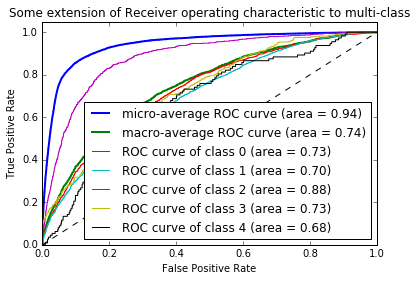

In [65]:
# Learn to predict each class against the other using Naiive Bysian classifier over tfidf text
rfc = OneVsRestClassifier(MultinomialNB(),n_jobs=-1)
y_score = rfc.fit(words_matrix_train, y_train).predict_proba(words_matrix_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


##############################################################################
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.figure(figsize=(3,2))

plt.show()

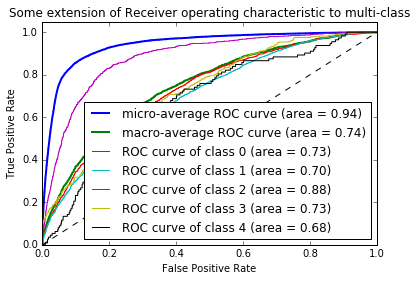

In [66]:
# Learn to predict each class against the other using CVC classifier over tfidf text
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True), n_jobs = -1)
y_score = rfc.fit(words_matrix_train, y_train).predict_proba(words_matrix_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


##############################################################################
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.figure(figsize=(3,2))

plt.show()

In [67]:
y_predict = rfc.predict(words_matrix_test)
y_predict


array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ..., 
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [68]:
y_score

array([[  3.51621229e-02,   6.99612910e-01,   2.12893311e-01,
          3.42147704e-03,   1.05627045e-04],
       [  2.30433780e-01,   7.21195583e-01,   1.91564307e-02,
          9.56615385e-03,   7.59307243e-04],
       [  5.21326346e-02,   8.20948073e-01,   2.70829226e-02,
          2.75499233e-02,   2.49095212e-03],
       ..., 
       [  9.15049353e-02,   7.63827302e-01,   5.60222666e-02,
          1.26569893e-02,   6.92039132e-04],
       [  1.48561029e-02,   9.41750395e-01,   1.49241030e-02,
          9.12905061e-03,   2.42082029e-04],
       [  8.32594693e-02,   7.41773779e-01,   1.75795630e-02,
          3.34857452e-02,   2.77034054e-03]])

In [69]:
#NMF dimension reduction
from sklearn.decomposition import NMF


In [70]:
nmf = NMF(n_components = 100, random_state=1, alpha=.1, l1_ratio=.5).fit(words_matrix)

In [ ]:
nmf_train = nmf.fit(words_matrix_train, y_train).transform(words_matrix_train)
nmf_test = nmf.transform(words_matrix_test)
nmf_word = nmf.transform(words_matrix)

In [ ]:
#one vs rest SVC classifier on nmf reduced matrix
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True), n_jobs = -1)
y_score = classifier.fit(nmf_train, y_train).decision_function(nmf_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


##############################################################################
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

plt.show()

In [ ]:
#Combine tfidf model of 'Consumer complaint narrative' prediction probability with other features
#df_model['tfidf_prob_narrative']= rfc_nmf.predict_proba(nmf_word)[:,1]

In [ ]:
X = np.concatenate((df_model.values, nmf_word), axis=1)

In [ ]:
df_model.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

In [ ]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''

    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)
    
    return tprs, fprs, thresholds.tolist()

def plot_roc(probs, y_true, title, xlabel, ylabel):
    # ROC
    tpr, fpr, thresholds = roc_curve(v_probs, y_test)

    plt.hold(True)
    plt.plot(fpr, tpr)

    # 45 degree line
    xx = np.linspace(0, 1.0, 20)
    plt.plot(xx, xx, color='red')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()

## First Logistic Regression Model

In [ ]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_test,y_test)

In [ ]:
v_probs = lr.predict_proba(X_test)[:, 1]

In [ ]:
plot_roc(v_probs, y_test, "ROC plot of  complaint dispute", 
         "False Positive Rate (1 - Specificity)", "True Positive Rate (Sensitivity, Recall)")

In [ ]:
import sklearn.metrics as skm
skm.roc_auc_score(y_test, v_probs)

In [ ]:
skm.recall_score(y_test, lr.predict(X_test))

In [ ]:
pd.crosstab(y_test, lr.predict(X_test))

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_true):
    cm = confusion_matrix(y_true, model.predict(X_test))

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
plot_confusion_matrix(lr, X_test, y_test)

In [ ]:
np.argsort(lr.coef_)[::-1]

In [ ]:
#sub_column = df_model.columns[np.argsort(lr.coef_)[::-1]][0][:245]

In [ ]:
#sub_column.shape

In [ ]:
#X_sub_column = df_model[sub_column]
#X_sub_train, X_sub_test, y_train, y_test = train_test_split(X_sub_column, y, test_size=0.20, random_state=67)

In [ ]:
#lr_sub = LogisticRegression(class_weight='auto')
#lr_sub.fit(X_sub_train, y_train)

In [ ]:
#lr_sub.score(X_sub_test,y_test)

In [ ]:
#skm.roc_auc_score(y_test,lr_sub.predict_proba(X_sub_test)[:, 1])

## Now try descision tree model

In [ ]:
#Gradiend Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

In [ ]:
#gbc = GradientBoostingClassifier(n_estimators=1000, max_depth=8, subsample=0.5, 
                            #    max_features='auto', learning_rate=0.01)
#gbc.fit(X_train, y_train)

In [ ]:
#gbc.score(X_test,y_test)

In [ ]:
#pd.crosstab(y_test, gbc.predict(X_test))

In [ ]:
#plot_confusion_matrix(gbc, X_test, y_test)

In [ ]:
#skm.roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])

In [ ]:
## Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=2000, n_jobs=-1, class_weight='auto', max_features=1)
rfc.fit(X_train, y_train)

In [ ]:
rfc.score(X_test, y_test)

In [ ]:
pd.crosstab(y_test, rfc.predict(X_test))

In [ ]:
skm.roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])

In [ ]:
skm.recall_score(y_test, rfc.predict(X_test))

In [ ]:
plot_confusion_matrix(rfc, X_test, y_test)

In [ ]:
def plot_importance(clf, X, max_features=10):
    '''Plot feature importance'''
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    # Show only top features
    pos = pos[-max_features:]
    feature_importance = (feature_importance[sorted_idx])[-max_features:]
    feature_names = (X.columns[sorted_idx])[-max_features:]
    
    plt.barh(pos, feature_importance, align='center')
    plt.yticks(pos, feature_names)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')

In [ ]:
plot_importance(rfc, df_model, max_features=10)